In [16]:
import h5py 

dset = h5py.File('data/dset.h5','r')

In [36]:
dep = dset['depth']
img = dset['image']
seg = dset['seg']

In [19]:
img.keys()

<KeysViewHDF5 ['hiking_125.jpg', 'indian+musicians_116.jpg', 'sandwich_96.jpg', 'sea_15.jpg', 'village_43.jpg']>

In [20]:
img_name = list(img.keys())[0]
img_name


'hiking_125.jpg'

In [37]:
seg1 = np.array(seg[img_name])
import numpy as np

In [38]:
seg1

array([[  1,   1,   1, ...,   3,   3,   3],
       [  1,   1,   1, ...,   3,   3,   3],
       [  1,   1,   1, ...,   3,   3,   3],
       ...,
       [197, 197, 197, ..., 186, 186, 186],
       [197, 197, 197, ..., 186, 186, 186],
       [197, 197, 197, ..., 186, 186, 186]], dtype=uint16)

In [49]:
dep[img_name][0]

array([[2.9983413, 2.9983413, 2.9983413, ..., 2.388872 , 2.388872 ,
        2.388872 ],
       [2.9983413, 2.9983413, 2.9983413, ..., 2.388872 , 2.388872 ,
        2.388872 ],
       [2.9983413, 2.9983413, 2.9983413, ..., 2.388872 , 2.388872 ,
        2.388872 ],
       ...,
       [3.037515 , 3.037515 , 3.037515 , ..., 1.6087259, 1.6087259,
        1.6087259],
       [3.037515 , 3.037515 , 3.037515 , ..., 1.6087259, 1.6087259,
        1.6087259],
       [3.037515 , 3.037515 , 3.037515 , ..., 1.6087259, 1.6087259,
        1.6087259]], dtype=float32)

In [53]:
import pickle 
f = open('../background/dep/hiking_125.dep','wb')
pickle.dump(dep[img_name][0].T, f)
f.close()

In [19]:
np.count_nonzero(segment==2)

20355

In [46]:
import numpy as np 

image = np.array(img[img_name])
print(image.shape)
depth = np.array(dep[img_name])
print(depth.shape)
segment = np.array(seg[img_name])
print(segment.shape)
depth = depth[0]
segment = cv2.resize(segment, depth.shape, cv2.INTER_NEAREST)
segment = segment.astype(np.float32)
print(segment.shape)
print(depth.T.shape)

(500, 600, 3)
(2, 600, 500)
(479, 575)
(500, 600)
(500, 600)


In [27]:
np.max(segment)

198

In [35]:
depth[0].shape

(600, 500)

## predict depth 

In [64]:
import numpy as np

import mxnet as mx
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [96]:
import PIL.Image as pil

filename = '../background/image_205.jpg'
img = pil.open(filename).convert('RGB')

original_width, original_height = img.size
feed_height = 192
feed_width = 640

img = img.resize((feed_width, feed_height), pil.LANCZOS)
img = transforms.ToTensor()(mx.nd.array(img)).expand_dims(0).as_in_context(context=ctx)

model = gluoncv.model_zoo.get_model('monodepth2_resnet18_kitti_stereo_640x192',
                                    pretrained_base=False, ctx=ctx, pretrained=True)


In [97]:
outputs = model.predict(img)
disp = outputs[("disp", 0)]
disp_resized = mx.nd.contrib.BilinearResize2D(disp, height=original_height, width=original_width)
disp_resized_np = disp_resized.squeeze().as_in_context(mx.cpu()).asnumpy()

In [99]:
depth = disp_resized_np
depth.shape
import pickle 
f = open('../background/depth/image_205.dep','wb')
pickle.dump(depth, f)


In [90]:
f = open('../background/depth/hiking_125.dep','rb')
depth = pickle.load(f)
depth.shape


(500, 600)

In [98]:
import matplotlib as mpl
import matplotlib.cm as cm

depth = disp_resized_np
vmax = np.percentile(depth, 95)
normalizer = mpl.colors.Normalize(vmin=depth.min(), vmax=vmax)
mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
colormapped_im = (mapper.to_rgba(depth)[:, :, :3] * 255).astype(np.uint8)
im = pil.fromarray(colormapped_im)
im.save('../background/depth/image_205_dep.jpg')


In [56]:
depth

array([[0.03538177, 0.03544095, 0.03533546, ..., 0.00413602, 0.00206594,
        0.00350965],
       [0.03540599, 0.03546796, 0.03535145, ..., 0.00415586, 0.00208026,
        0.00353293],
       [0.03543022, 0.03549497, 0.03536743, ..., 0.0041757 , 0.00209459,
        0.00355621],
       ...,
       [0.00681632, 0.00335916, 0.00611177, ..., 0.00489027, 0.00261037,
        0.00418704],
       [0.00678004, 0.00334531, 0.00608495, ..., 0.00490944, 0.00261564,
        0.00419351],
       [0.00674376, 0.00333145, 0.00605813, ..., 0.00492861, 0.00262092,
        0.00419998]], dtype=float32)

## predict segments

## render text

In [1]:
from synthgen import RendererV3 

DATA_PATH = 'data'
renderer = RendererV3(DATA_PATH)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
import pickle 
import cv2 
import numpy as np

image = cv2.cvtColor(cv2.imread('../background/image_179.jpg'), cv2.COLOR_BGR2RGB)
seg = pickle.load(open('../background/seg/image_179.seg','rb'))
dep = pickle.load(open('../background/depth/image_179.dep','rb'))

In [14]:
area = []
label = []
for i in range(np.max(seg)):
    area.append(np.count_nonzero(seg==i))
    label.append(i+1)

area = np.array(area)
label = np.array(label)

In [33]:
segment.shape

(600, 500)

In [16]:
res = renderer.render_text(image, dep, seg, area, label, ninstance=1)

In [54]:
print(image.shape, image.dtype)
print(depth.T.shape, depth.dtype)
print(segment.shape, segment.dtype)
print(area.shape, area.dtype)
print(label.shape, label.dtype)

(500, 600, 3) uint8
(500, 600) float32
(500, 600) float32
(198,) int64
(198,) int64


In [60]:
res = renderer.render_text(image, depth.T, segment, area, label, ninstance=1)

c:\Users\phidch\Downloads\textDetection\SynthText\gen_text\synthgen.py:206: RuntimeWarning: invalid value encountered in double_scalars
  s = max(lt1 / l1, lt2 / l2)
Traceback (most recent call last):
  File "c:\Users\phidch\Downloads\textDetection\SynthText\gen_text\synthgen.py", line 619, in render_text
    regions = self.filter_for_placement(xyz, seg, regions)
  File "c:\Users\phidch\Downloads\textDetection\SynthText\gen_text\synthgen.py", line 395, in filter_for_placement
    res = get_text_placement_mask(xyz, seg == l, regions['coeff'][idx], pad=2)
  File "c:\Users\phidch\Downloads\textDetection\SynthText\gen_text\synthgen.py", line 254, in get_text_placement_mask
    s = rescale_frontoparallel(pts_tmp, boxR, pts[0])
  File "c:\Users\phidch\Downloads\textDetection\SynthText\gen_text\synthgen.py", line 203, in rescale_frontoparallel
    lt1 = np.linalg.norm(p_im[n1, :] - p_im[n0, :])
IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed


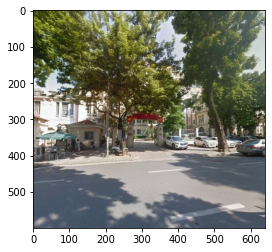

In [3]:
from matplotlib import pyplot as plt 

plt.imshow(image)

## config more fonts

In [42]:
import os 
source = 'data/fonts/vn'
fontlist = os.listdir(source)
for font in fontlist:
    if font.split('.')[1] != "ttf":
        fontlist.remove(font)
    old_path = os.path.join(source, font)
    new_path = os.path.join(source, font.replace(' ','_'))
    os.rename(old_path, new_path)

fontlist = os.listdir(source)
for font in fontlist:
    if font.split('.')[1] != "ttf":
        fontlist.remove(font)
        
len(fontlist)

203

In [43]:
f = open('data/fonts/fontlist.txt','w')
f.truncate()
for font in fontlist:
    f.write('vn/'+font+'\n')
f.close()

In [45]:
import cv2 

img = cv2.imread('masks\hiking_125.jpg')
img.shape

(500, 600, 3)

## test for text render


In [81]:
import pickle 
import cv2
import numpy as np
from PIL import Image
import os 

NAME = 'image_162'
source = '../gen_london'
img_path = os.path.join(source, 'image/'+NAME+'.jpg')
seg_path = os.path.join(source, 'seg/'+NAME+'.seg')
dep_path = os.path.join(source, 'dep/'+NAME+'.dep')


img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
dep = pickle.load(open(dep_path, 'rb'))
seg = pickle.load(open(seg_path, 'rb'))

label_, area_ = np.unique(seg, return_counts=True)
choose_area = [0,1,2,11,13,15]
label = []
area = []
for idx, lb in enumerate(label_):
    if lb in choose_area:
        label.append(lb)
        area.append(area_[idx])
label = np.array(label)
area = np.array(area)

seg = seg.astype('float32')
# sz = dep.shape[:2][::-1]
# img = Image.fromarray(img)
# img = np.array(img.resize(sz, Image.ANTIALIAS))
# seg = np.array(Image.fromarray(seg).resize(
#     sz, Image.NEAREST)).astype(np.float32)    

0: road, 1: pavement, 2: building, 8: tres, 10: sky,11: human, 13: cars, 15: bus


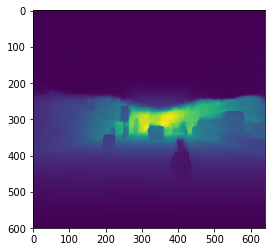

In [82]:
from matplotlib import pyplot as plt 
plt.imshow(dep)

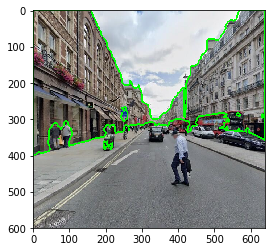

In [45]:
mask = seg==2
contour, hier = cv2.findContours(mask.copy().astype('uint8'),
                                    mode=cv2.RETR_CCOMP,
                                    method=cv2.CHAIN_APPROX_SIMPLE)
img_con = cv2.drawContours(img.copy(), contour, -1, (0,255,0), 3, hierarchy=hier)
plt.imshow(img_con)

In [46]:
from synthgen import RendererV3

In [49]:
renderer = RendererV3('data')

In [83]:
res = renderer.render_text(img, dep, seg, area, label, ninstance=10)
result = res[0]['img']

 ** instance # : 0
    ... try text rendering for %s regions 5
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
 ** instance # : 1
    ... try text rendering for %s regions 5
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
 ** instance # : 2
    ... try text rendering for %s regions 5
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
    ... text rendering attempt finished successfully
 ** instance # : 3
    ... try text rendering for %s regions 5
    ..

In [86]:
for i in range(10):
    cv2.imwrite('results/image_'+str(i)+'.jpg', res[i]['img'])

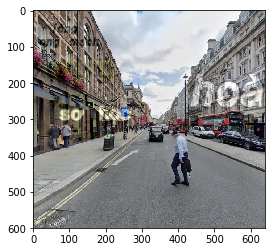

In [84]:
plt.imshow(res[0]['img'])

In [325]:
from synthgen import TextRegions 
regions = TextRegions.filter(seg, area, label)

In [326]:
import synth_utils as su 

xyz = su.DepthCamera.depth2xyz(dep)
regions = TextRegions.filter_depth(xyz, seg, regions)

In [327]:
from synthgen import rescale_frontoparallel

def get_text_placement_mask(xyz, mask, plane, pad=2, viz=False):
    """
    Returns a binary mask in which text can be placed.
    Also returns a homography from original image
    to this rectified mask.

    XYZ  : (HxWx3) image xyz coordinates
    MASK : (HxW) : non-zero pixels mark the object mask
    REGION : DICT output of TextRegions.get_regions
    PAD : number of pixels to pad the placement-mask by
    """
    contour, hier = cv2.findContours(mask.copy().astype('uint8'),
                                     mode=cv2.RETR_CCOMP,
                                     method=cv2.CHAIN_APPROX_SIMPLE)
    contour = [np.squeeze(c).astype('float') for c in contour]
    
    
    
    len_con = []
    for con in contour:
        len_con.append(len(con))
    index = len_con.index(max(len_con))
    contour = [contour[index]]

    
    
    # plane = np.array([plane[1],plane[0],plane[2],plane[3]])
    H, W = mask.shape[:2]

    # bring the contour 3d points to fronto-parallel config:
    pts, pts_fp = [], []
    center = np.array([W, H]) / 2
    n_front = np.array([0.0, 0.0, -1.0])
    for i in range(len(contour)):
        cnt_ij = contour[i]
        xyz = su.DepthCamera.plane2xyz(center, cnt_ij, plane)
        R = su.rot3d(plane[:3], n_front)
        xyz = xyz.dot(R.T)
        pts_fp.append(xyz[:, :2])
        pts.append(cnt_ij)

    # unrotate in 2D plane:
    rect = cv2.minAreaRect(pts_fp[0].copy().astype('float32'))
    box = np.array(cv2.boxPoints(rect))
    R2d = su.unrotate2d(box.copy())
    box = np.vstack([box, box[0, :]])  # close the box for visualization

    mu = np.median(pts_fp[0], axis=0)
    pts_tmp = (pts_fp[0] - mu[None, :]).dot(R2d.T) + mu[None, :]
    boxR = (box - mu[None, :]).dot(R2d.T) + mu[None, :]

    # rescale the unrotated 2d points to approximately
    # the same scale as the target region:
    s = rescale_frontoparallel(pts_tmp, boxR, pts[0])
    boxR *= s
    for i in range(len(pts_fp)):
        pts_fp[i] = s * ((pts_fp[i] - mu[None, :]).dot(R2d.T) + mu[None, :])

    # paint the unrotated contour points:
    minxy = -np.min(boxR, axis=0) + pad // 2
    ROW = np.max(ssd.pdist(np.atleast_2d(boxR[:, 0]).T))
    COL = np.max(ssd.pdist(np.atleast_2d(boxR[:, 1]).T))

    place_mask = 255 * np.ones((int(np.ceil(COL)) + pad, int(np.ceil(ROW)) + pad), 'uint8')

    pts_fp_i32 = [(pts_fp[i] + minxy[None, :]).astype('int32') for i in range(len(pts_fp))]
    
    
    
    
    # cv2.drawContours(place_mask, pts_fp_i32, -1, 0,
    #                  thickness=cv2.FILLED,
    #                  lineType=8, hierarchy=hier)
    cv2.drawContours(place_mask, pts_fp_i32, -1, 0,
                    thickness=cv2.FILLED,
                    lineType=8)
    
    
    

    if not TextRegions.filter_rectified((~place_mask).astype('float') / 255):
        return

    # calculate the homography
    H, _ = cv2.findHomography(pts[0].astype('float32').copy(),
                              pts_fp_i32[0].astype('float32').copy(),
                              method=0)

    Hinv, _ = cv2.findHomography(pts_fp_i32[0].astype('float32').copy(),
                                 pts[0].astype('float32').copy(),
                                 method=0)

    return place_mask, H, Hinv

In [328]:
# from synthgen import get_text_placement_mask

def filter_regions(regions, filt):
    """
    filt : boolean list of regions to keep.
    """
    idx = np.arange(len(filt))[filt]
    for k in regions.keys():
        regions[k] = [regions[k][i] for i in idx]
    return regions

def filter_for_placement(xyz, seg, regions):
    filt = np.zeros(len(regions['label'])).astype('bool')
    masks, Hs, Hinvs = [], [], []
    for idx, l in enumerate(regions['label']):
        res = get_text_placement_mask(xyz, seg == l, regions['coeff'][idx], pad=2)
        if res is not None:
            print(1)
            mask, H, Hinv = res
            masks.append(mask)
            Hs.append(H)
            Hinvs.append(Hinv)
            filt[idx] = True

    regions = filter_regions(regions, filt)
    regions['place_mask'] = masks
    regions['homography'] = Hs
    regions['homography_inv'] = Hinvs

    return regions

In [329]:
regions = filter_for_placement(xyz, seg, regions)

1
1
1
1


In [320]:
idx = 0
l = regions['label'][idx]
mask = seg==l 
plane = regions['coeff'][idx]
pad = 2

res = get_text_placement_mask(xyz, seg == l, regions['coeff'][idx], pad=2)

In [267]:
idx = 0
l = regions['label'][idx]
mask = seg==l 
plane = regions['coeff'][idx]
pad = 2

contour, hier = cv2.findContours(mask.copy().astype('uint8'),
                                    mode=cv2.RETR_CCOMP,
                                    method=cv2.CHAIN_APPROX_SIMPLE)

In [268]:
len_con = []
for con in contour:
    len_con.append(len(con))
len_con.index(max(len_con))

0

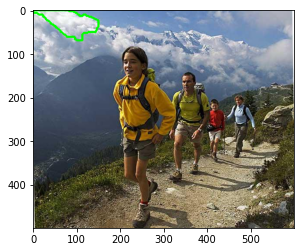

In [269]:
img_con = cv2.drawContours(img.copy(), contour, -1, (0,255,0), 3, hierarchy=hier)
plt.imshow(img_con)

In [296]:
# def get_text_placement_mask(xyz, mask, plane, pad=2):

idx = 0
l = regions['label'][idx]
mask = seg==l 
plane = regions['coeff'][idx]
pad = 2

contour, hier = cv2.findContours(mask.copy().astype('uint8'),
                                    mode=cv2.RETR_CCOMP,
                                    method=cv2.CHAIN_APPROX_SIMPLE)
contour = [np.squeeze(c).astype('float') for c in contour]

len_con = []
for con in contour:
    len_con.append(len(con))
index = len_con.index(max(len_con))
contour = [contour[index]]

# plane = np.array([plane[1],plane[0],plane[2],plane[3]])
H, W = mask.shape[:2]

# bring the contour 3d points to fronto-parallel config:
pts, pts_fp = [], []
center = np.array([W, H]) / 2
n_front = np.array([0.0, 0.0, -1.0])
for i in range(len(contour)):
    cnt_ij = contour[i]
    xyz = su.DepthCamera.plane2xyz(center, cnt_ij, plane)
    R = su.rot3d(plane[:3], n_front)
    xyz = xyz.dot(R.T)
    pts_fp.append(xyz[:, :2])
    pts.append(cnt_ij)

# unrotate in 2D plane:
rect = cv2.minAreaRect(pts_fp[0].copy().astype('float32'))
box = np.array(cv2.boxPoints(rect))
R2d = su.unrotate2d(box.copy())
box = np.vstack([box, box[0, :]])  # close the box for visualization

mu = np.median(pts_fp[0], axis=0)
pts_tmp = (pts_fp[0] - mu[None, :]).dot(R2d.T) + mu[None, :]
boxR = (box - mu[None, :]).dot(R2d.T) + mu[None, :]

    # return place_mask, H, Hinv

In [297]:
# rescale the unrotated 2d points to approximately
# the same scale as the target region:
s = rescale_frontoparallel(pts_tmp, boxR, pts[0])
boxR *= s
for i in range(len(pts_fp)):
    pts_fp[i] = s * ((pts_fp[i] - mu[None, :]).dot(R2d.T) + mu[None, :])

# paint the unrotated contour points:
minxy = -np.min(boxR, axis=0) + pad // 2
ROW = np.max(ssd.pdist(np.atleast_2d(boxR[:, 0]).T))
COL = np.max(ssd.pdist(np.atleast_2d(boxR[:, 1]).T))

place_mask = 255 * np.ones((int(np.ceil(COL)) + pad, int(np.ceil(ROW)) + pad), 'uint8')

pts_fp_i32 = [(pts_fp[i] + minxy[None, :]).astype('int32') for i in range(len(pts_fp))]
# cv2.drawContours(place_mask, pts_fp_i32, -1, 0,
#                     thickness=cv2.FILLED,
#                     lineType=8, hierarchy=hier)
cv2.drawContours(place_mask, pts_fp_i32, -1, 0,
                    thickness=cv2.FILLED,
                    lineType=8)

# calculate the homography
H, _ = cv2.findHomography(pts[0].astype('float32').copy(),
                            pts_fp_i32[0].astype('float32').copy(),
                            method=0)

Hinv, _ = cv2.findHomography(pts_fp_i32[0].astype('float32').copy(),
                                pts[0].astype('float32').copy(),
                                method=0)

In [298]:
print(TextRegions.filter_rectified((~place_mask).astype('float') / 255))

True
